In [1]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

In [2]:
df_kospi = fdr.StockListing("KOSPI")
usdkrw = fdr.DataReader('USD/KRW') # 달러 원화

In [3]:
df_kospi.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [4]:
usdkrw.head()

,Close,Open,High,Low,Change
Date,,,,,
1981-04-14,676.70,676.70,676.70,676.70,0.0019
1981-04-15,676.70,676.70,676.70,676.70,0.0000
1981-04-16,676.70,676.70,676.70,676.70,0.0000
1981-04-17,676.75,676.75,676.75,676.75,0.0001
1981-04-20,676.70,676.70,676.70,676.70,-0.0001


In [72]:
# 불러올 종가의 목록 입니다.
stock_dict = {
    '삼성SDI': '006400',
    '삼성전자': '005930',
    'SK하이닉스': '000660',
    'LG전자': '066570',
    '삼성전기': '009150',
    'LG': '003550',
    'LG디스플레이': '034220',
    'LG이노텍': '011070',
    'DB하이텍': '000990',
    '일진머티리얼즈': '020150'}

# 반복문을 사용하여 여러 종목의 종가를 수집합니다.
item_list = []
for item_code in stock_dict.values():
    close = fdr.DataReader(item_code, "2012", "2022")['Close']
    item_list.append(close)
    
# 수집한 리스트를 axis=1(컬럼)을 기준으로 병합(concat) 합니다.
# 이 때, 컬럼은 stock_dict 의 key 값을 사용합니다.
kospi_IT = pd.concat(item_list, axis=1)
kospi_IT.columns = stock_dict.keys()
kospi_IT = kospi_IT / kospi_IT.iloc[0] # normalize
kospi_IT.head()

,삼성SDI,삼성전자,SK하이닉스,LG전자,삼성전기,LG,LG디스플레이,LG이노텍,DB하이텍,일진머티리얼즈
Date,,,,,,,,,,
2012-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2012-01-03,1.025455,1.023148,1.008529,1.017083,1.034048,1.048780,1.026052,1.015737,0.996124,1.020240
2012-01-04,1.007273,1.000000,1.017058,0.981603,1.021438,1.052034,1.024048,1.015737,1.031008,0.988477
2012-01-05,0.974545,0.976852,1.023454,0.971091,1.046658,1.032515,1.026052,1.002861,1.040052,0.976894
2012-01-06,0.978182,0.962963,1.040512,0.951380,1.059269,1.026008,1.008016,0.981402,1.025840,0.959580


In [69]:
df = (kospi_IT.sum(axis=1) / 10 * 100).to_frame(name="kospi_IT")
df['usdkrw'] = usdkrw['Close']
df.head()

,kospi_IT,usdkrw
Date,,
2012-01-02,100.000000,1155.15
2012-01-03,102.151956,1145.70
2012-01-04,101.386742,1148.35
2012-01-05,100.709741,1156.05
2012-01-06,99.931506,1160.50


상관계수 : 0.26


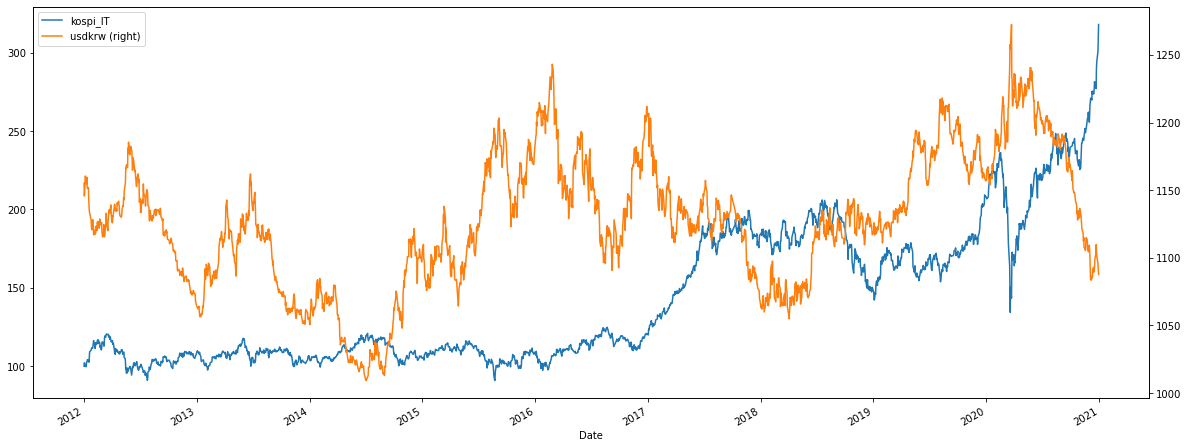

In [7]:
print(f"상관계수 : {df['kospi_IT'].corr(df['usdkrw']):.2f}")

df[["kospi_IT", "usdkrw"]].plot(secondary_y="usdkrw", figsize=(20,8))
plt.show()

In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [40]:
df_scaler = df.copy()

In [41]:
scaler = StandardScaler()

In [42]:
df_scaler[["kospi_IT", "usdkrw"]] = scaler.fit_transform(df)

상관계수 : 0.26


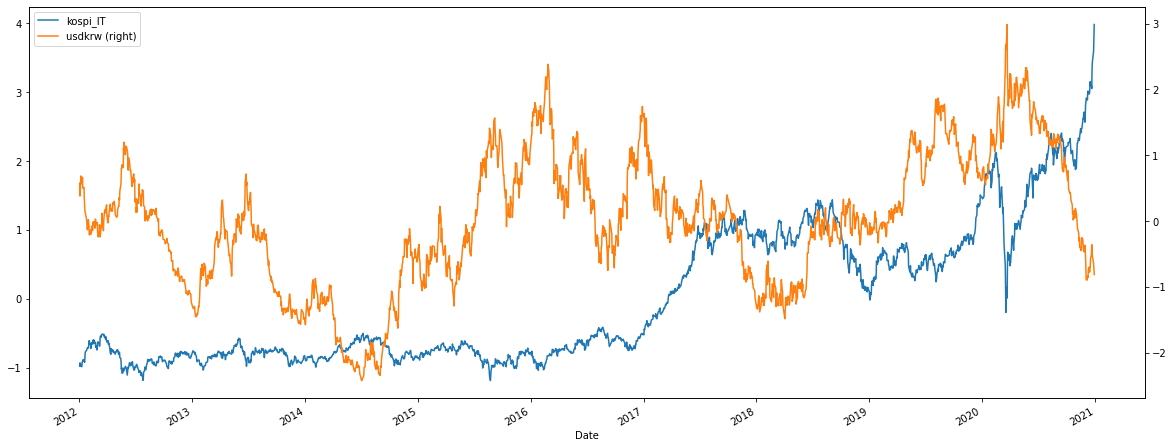

In [43]:
print(f"상관계수 : {df_scaler['kospi_IT'].corr(df_scaler['usdkrw']):.2f}")

df_scaler[["kospi_IT", "usdkrw"]].plot(secondary_y="usdkrw", figsize=(20,8))
plt.show()

In [53]:
df_change = df[['kospi_IT', 'usdkrw']].pct_change().dropna().copy()

상관계수 : -0.25


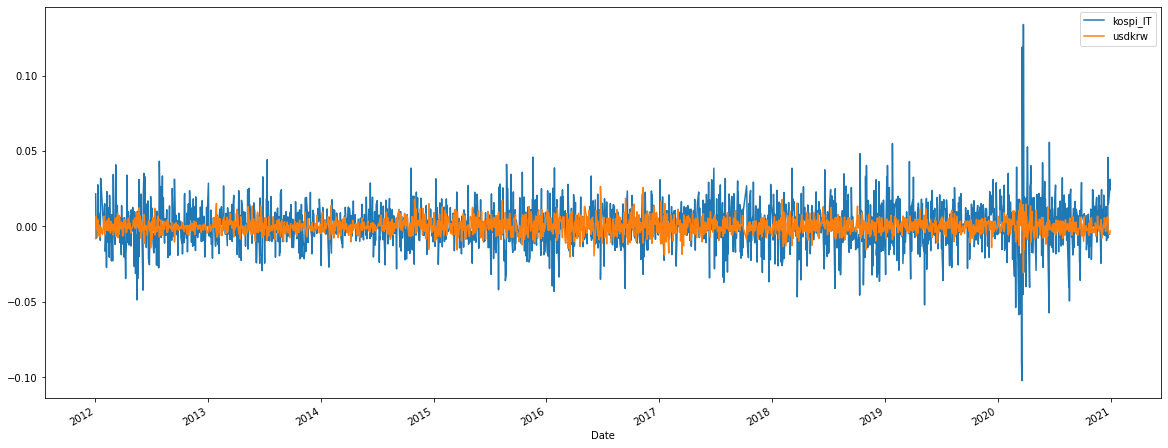

In [70]:
print(f"상관계수 : {df_change['kospi_IT'].corr(df_change['usdkrw']):.2f}")

df_change[["kospi_IT", "usdkrw"]].plot(figsize=(20,8))
plt.show()

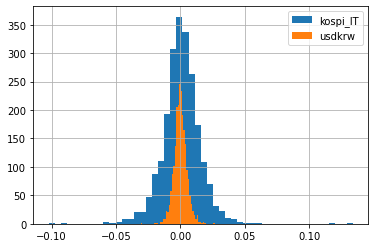

In [64]:
for col in df_change.columns:
    df_change[col].hist(bins=50, label=col)
    plt.legend()
plt.show()